In [1]:
import pandas as pd

In [2]:
from __future__ import division
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
team_bans = pd.read_csv('data/teambans.csv')
champs = pd.read_csv('data/champs.csv')
parti = pd.read_csv('data/participants.csv')
matches = pd.read_csv('data/matches.csv')
stats_1 = pd.read_csv('data/stats1.csv')
stats_2 = pd.read_csv('data/stats2.csv')
team_s = pd.read_csv('data/teamstats.csv')

/Library/anaconda2/envs/tfdeeplearning/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (52) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
matches.head()

,id,gameid,platformid,queueid,seasonid,duration,creation,version
0,10,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675
1,11,3187425281,EUW1,420,8,1693,1495066760778,7.10.187.9675
2,12,3187269801,EUW1,420,8,1482,1495053375889,7.10.187.9675
3,13,3187252065,EUW1,420,8,1954,1495050993613,7.10.187.9675
4,14,3187201038,EUW1,420,8,2067,1495047893400,7.10.187.9675


In [5]:
champs.head()

,name,id
0,Jax,24
1,Sona,37
2,Tristana,18
3,Varus,110
4,Fiora,114


In [6]:
stats_1.head()

,id,win,item1,item2,item3,item4,item5,item6,trinket,kills,...,neutralminionskilled,ownjunglekills,enemyjunglekills,totcctimedealt,champlvl,pinksbought,wardsbought,wardsplaced,wardskilled,firstblood
0,9,0,3748,2003,3111,3053,1419,1042,3340,6,...,69,42,27,610,13,0,0,10,0,0
1,10,0,2301,3111,3190,3107,0,0,3364,0,...,1,1,0,211,14,1,0,17,3,0
2,11,0,1055,3072,3006,3031,3046,1036,3340,7,...,3,1,2,182,14,1,0,13,5,0
3,12,0,1029,3078,3156,1001,3053,0,3340,5,...,6,6,0,106,15,0,0,3,0,0
4,13,0,3020,1058,3198,3102,1052,1026,3340,2,...,4,3,1,159,15,0,0,10,0,0


In [7]:
stats_2.head()

,id,win,item1,item2,item3,item4,item5,item6,trinket,kills,...,neutralminionskilled,ownjunglekills,enemyjunglekills,totcctimedealt,champlvl,pinksbought,wardsbought,wardsplaced,wardskilled,firstblood
0,1028382,0,1056,3001,1052,3020,1058,1026,3340,7,...,0,0,0,50,12,0,0,6,0,0
1,1028383,0,1041,2003,0,0,0,0,3340,0,...,11,11,0,114,3,0,0,0,0,0
2,1028384,0,1036,2010,0,0,0,0,3340,0,...,0,0,0,0,1,0,0,0,0,0
3,1028385,0,1055,2010,0,0,0,0,3340,0,...,0,0,0,0,2,0,0,0,0,0
4,1028386,0,2033,0,0,0,0,0,3340,0,...,0,0,0,0,3,0,0,0,0,0


In [8]:
stats_1.columns == stats_2.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [9]:
stats = pd.concat([stats_1,stats_2], ignore_index=True)

In [10]:
len(stats)

1834517

In [11]:
len(parti)

1834520

In [12]:
parti.head(15)

,id,matchid,player,championid,ss1,ss2,role,position
0,9,10,1,19,4,11,NONE,JUNGLE
1,10,10,2,267,3,4,DUO_SUPPORT,BOT
2,11,10,3,119,7,4,DUO_CARRY,BOT
3,12,10,4,114,12,4,SOLO,TOP
4,13,10,5,112,4,3,SOLO,MID
5,14,10,6,72,11,4,NONE,JUNGLE
6,15,10,7,3,4,12,SOLO,TOP
7,16,10,8,103,14,4,SOLO,MID
8,17,10,9,222,7,4,DUO_CARRY,BOT
9,18,10,10,161,14,4,DUO_SUPPORT,BOT


In [13]:
stats.head()

,id,win,item1,item2,item3,item4,item5,item6,trinket,kills,...,neutralminionskilled,ownjunglekills,enemyjunglekills,totcctimedealt,champlvl,pinksbought,wardsbought,wardsplaced,wardskilled,firstblood
0,9,0,3748,2003,3111,3053,1419,1042,3340,6,...,69,42,27,610,13,0,0,10,0,0
1,10,0,2301,3111,3190,3107,0,0,3364,0,...,1,1,0,211,14,1,0,17,3,0
2,11,0,1055,3072,3006,3031,3046,1036,3340,7,...,3,1,2,182,14,1,0,13,5,0
3,12,0,1029,3078,3156,1001,3053,0,3340,5,...,6,6,0,106,15,0,0,3,0,0
4,13,0,3020,1058,3198,3102,1052,1026,3340,2,...,4,3,1,159,15,0,0,10,0,0


## Join table

In [14]:
df = pd.merge(parti, stats, how = 'left', on = ['id'], suffixes=('', '_y'))
df = pd.merge(df, champs, how = 'left', left_on = 'championid', right_on = 'id', suffixes=('', '_y'))
df = pd.merge(df, matches, how = 'left', left_on = 'matchid', right_on = 'id', suffixes=('', '_y'))

In [15]:
df.columns

Index(['id', 'matchid', 'player', 'championid', 'ss1', 'ss2', 'role',
       'position', 'win', 'item1', 'item2', 'item3', 'item4', 'item5', 'item6',
       'trinket', 'kills', 'deaths', 'assists', 'largestkillingspree',
       'largestmultikill', 'killingsprees', 'longesttimespentliving',
       'doublekills', 'triplekills', 'quadrakills', 'pentakills',
       'legendarykills', 'totdmgdealt', 'magicdmgdealt', 'physicaldmgdealt',
       'truedmgdealt', 'largestcrit', 'totdmgtochamp', 'magicdmgtochamp',
       'physdmgtochamp', 'truedmgtochamp', 'totheal', 'totunitshealed',
       'dmgselfmit', 'dmgtoobj', 'dmgtoturrets', 'visionscore', 'timecc',
       'totdmgtaken', 'magicdmgtaken', 'physdmgtaken', 'truedmgtaken',
       'goldearned', 'goldspent', 'turretkills', 'inhibkills',
       'totminionskilled', 'neutralminionskilled', 'ownjunglekills',
       'enemyjunglekills', 'totcctimedealt', 'champlvl', 'pinksbought',
       'wardsbought', 'wardsplaced', 'wardskilled', 'firstblood', 'name

In [16]:
df['role']

0                 NONE
1          DUO_SUPPORT
2            DUO_CARRY
3                 SOLO
4                 SOLO
5                 NONE
6                 SOLO
7                 SOLO
8            DUO_CARRY
9          DUO_SUPPORT
10         DUO_SUPPORT
11           DUO_CARRY
12                SOLO
13                SOLO
14                NONE
15           DUO_CARRY
16                SOLO
17                SOLO
18         DUO_SUPPORT
19                NONE
20           DUO_CARRY
21         DUO_SUPPORT
22                SOLO
23                NONE
24                SOLO
25                SOLO
26                NONE
27                SOLO
28         DUO_SUPPORT
29           DUO_CARRY
              ...     
1834490           NONE
1834491           SOLO
1834492    DUO_SUPPORT
1834493      DUO_CARRY
1834494           SOLO
1834495    DUO_SUPPORT
1834496           SOLO
1834497           SOLO
1834498      DUO_CARRY
1834499           NONE
1834500      DUO_CARRY
1834501    DUO_SUPPORT
1834502    

In [17]:
df['position']

0          JUNGLE
1             BOT
2             BOT
3             TOP
4             MID
5          JUNGLE
6             TOP
7             MID
8             BOT
9             BOT
10            BOT
11            BOT
12            MID
13            TOP
14         JUNGLE
15            BOT
16            TOP
17            MID
18            BOT
19         JUNGLE
20            BOT
21            BOT
22            MID
23         JUNGLE
24            TOP
25            MID
26         JUNGLE
27            TOP
28            BOT
29            BOT
            ...  
1834490    JUNGLE
1834491       TOP
1834492       BOT
1834493       BOT
1834494       MID
1834495       BOT
1834496       TOP
1834497       MID
1834498       BOT
1834499    JUNGLE
1834500       TOP
1834501       BOT
1834502       MID
1834503       BOT
1834504       TOP
1834505       BOT
1834506    JUNGLE
1834507       MID
1834508       BOT
1834509       TOP
1834510       MID
1834511       BOT
1834512    JUNGLE
1834513       TOP
1834514   

## Transform table

In [18]:
# add a final position column, based on role and position(which only show BOT for support and carry)
# so adjposition includes TOP, MID, JUNGLE, DUO_SUPPORT, DUO_CARRY
def final_position(row):
    if row['role'] in ('DUO_SUPPORT', 'DUO_CARRY'):
        return row['role']
    else:
        return row['position']

df['adjposition'] = df.apply(final_position, axis = 1)

In [19]:
# seperate team from players index
df['team'] = df['player'].apply(lambda x: '1' if x <= 5 else '2')

In [20]:
# remove matchid with duplicate roles, e.g. 3 MID in same team, etc
# remove_index stores all index that need to be removed from df
df['team_role'] = df['team'] + ' - ' + df['adjposition']
remove_index = []
for i in ('1 - MID', '1 - TOP', '1 - DUO_SUPPORT', '1 - DUO_CARRY', '1 - JUNGLE', '2 - MID', '2 - TOP', '2 - DUO_SUPPORT', '2 - DUO_CARRY', '2 - JUNGLE'):
    df_remove = df[df['team_role'] == i].groupby('matchid').agg({'team_role':'count'})
    remove_index.extend(df_remove[df_remove['team_role']!=1].index.values)

In [21]:
# remove unclassified BOT, correct ones should be DUO_SUPPORT OR DUO_CARRY
remove_index.extend(df[df['adjposition'] == 'BOT']['matchid'].unique())
remove_index = list(set(remove_index))

In [22]:
# remove the match which in the remove_index
print('# matches in dataset before cleaning: {}'.format(df['matchid'].nunique()))
df = df[~df['matchid'].isin(remove_index)]
print('# matches in dataset after cleaning: {}'.format(df['matchid'].nunique()))

# matches in dataset before cleaning: 184069
# matches in dataset after cleaning: 148638


In [23]:
# Selected specific features
df_se = df[['id', 'matchid', 'player', 'name', 'adjposition', 'team_role', 
         'win', 'kills', 'deaths', 'assists', 'turretkills',
         'totdmgtochamp', 'totheal', 'totminionskilled', 
         'goldspent', 'totdmgtaken', 'inhibkills', 
         'pinksbought', 'wardsplaced', 'duration', 
         'platformid', 'seasonid', 'version']]
df_se.head(10)

,id,matchid,player,name,adjposition,team_role,win,kills,deaths,assists,...,totminionskilled,goldspent,totdmgtaken,inhibkills,pinksbought,wardsplaced,duration,platformid,seasonid,version
0,9,10,1,Warwick,JUNGLE,1 - JUNGLE,0.0,6.0,10.0,1.0,...,42.0,10275.0,41446.0,0.0,0.0,10.0,1909,EUW1,8,7.10.187.9675
1,10,10,2,Nami,DUO_SUPPORT,1 - DUO_SUPPORT,0.0,0.0,2.0,12.0,...,17.0,7975.0,17769.0,0.0,1.0,17.0,1909,EUW1,8,7.10.187.9675
2,11,10,3,Draven,DUO_CARRY,1 - DUO_CARRY,0.0,7.0,8.0,5.0,...,205.0,11775.0,25627.0,0.0,1.0,13.0,1909,EUW1,8,7.10.187.9675
3,12,10,4,Fiora,TOP,1 - TOP,0.0,5.0,11.0,2.0,...,164.0,10683.0,31705.0,0.0,0.0,3.0,1909,EUW1,8,7.10.187.9675
4,13,10,5,Viktor,MID,1 - MID,0.0,2.0,8.0,2.0,...,235.0,10485.0,20585.0,0.0,0.0,10.0,1909,EUW1,8,7.10.187.9675
5,14,10,6,Skarner,JUNGLE,2 - JUNGLE,1.0,3.0,3.0,9.0,...,28.0,11758.0,22708.0,0.0,0.0,8.0,1909,EUW1,8,7.10.187.9675
6,15,10,7,Galio,TOP,2 - TOP,1.0,4.0,5.0,11.0,...,187.0,11575.0,21719.0,0.0,1.0,7.0,1909,EUW1,8,7.10.187.9675
7,16,10,8,Ahri,MID,2 - MID,1.0,13.0,4.0,8.0,...,183.0,13750.0,19174.0,0.0,0.0,8.0,1909,EUW1,8,7.10.187.9675
8,17,10,9,Jinx,DUO_CARRY,2 - DUO_CARRY,1.0,15.0,3.0,9.0,...,191.0,14375.0,17655.0,2.0,1.0,6.0,1909,EUW1,8,7.10.187.9675
9,18,10,10,VelKoz,DUO_SUPPORT,2 - DUO_SUPPORT,1.0,4.0,5.0,19.0,...,72.0,11675.0,13443.0,0.0,5.0,25.0,1909,EUW1,8,7.10.187.9675


In [24]:
df.columns.values

array(['id', 'matchid', 'player', 'championid', 'ss1', 'ss2', 'role',
       'position', 'win', 'item1', 'item2', 'item3', 'item4', 'item5',
       'item6', 'trinket', 'kills', 'deaths', 'assists',
       'largestkillingspree', 'largestmultikill', 'killingsprees',
       'longesttimespentliving', 'doublekills', 'triplekills',
       'quadrakills', 'pentakills', 'legendarykills', 'totdmgdealt',
       'magicdmgdealt', 'physicaldmgdealt', 'truedmgdealt', 'largestcrit',
       'totdmgtochamp', 'magicdmgtochamp', 'physdmgtochamp',
       'truedmgtochamp', 'totheal', 'totunitshealed', 'dmgselfmit',
       'dmgtoobj', 'dmgtoturrets', 'visionscore', 'timecc', 'totdmgtaken',
       'magicdmgtaken', 'physdmgtaken', 'truedmgtaken', 'goldearned',
       'goldspent', 'turretkills', 'inhibkills', 'totminionskilled',
       'neutralminionskilled', 'ownjunglekills', 'enemyjunglekills',
       'totcctimedealt', 'champlvl', 'pinksbought', 'wardsbought',
       'wardsplaced', 'wardskilled', 'firstblood'

In [25]:
df.shape

(1486362, 76)

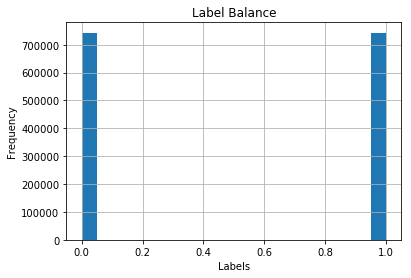

In [26]:
df['win'].hist(bins = 20)
plt.title('Label Balance')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.savefig('balance.png')

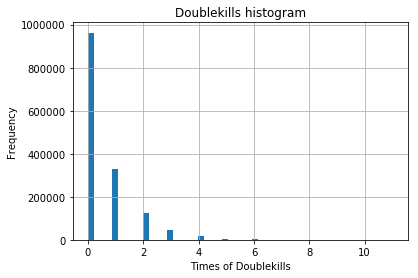

In [27]:
df['doublekills'].hist(bins = 50)
plt.title('Doublekills histogram')
plt.xlabel('Times of Doublekills')
plt.ylabel('Frequency')
plt.savefig('doublekills.png')

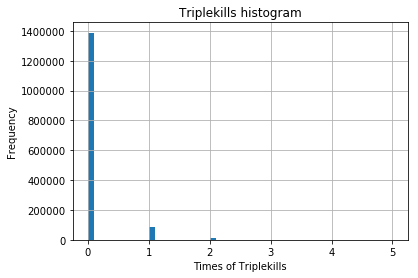

In [28]:
df['triplekills'].hist(bins = 50)
plt.title('Triplekills histogram')
plt.xlabel('Times of Triplekills')
plt.ylabel('Frequency')
plt.savefig('Triplekills.png')

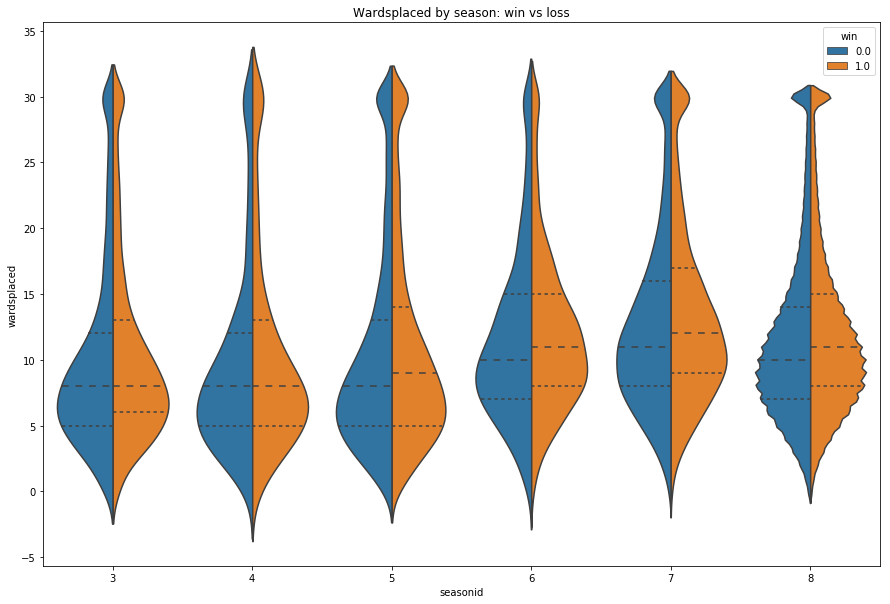

In [29]:
df_v = df_se.copy()
# put upper and lower limit from 0 to 30
df_v['wardsplaced'] = df_v['wardsplaced'].apply(lambda x: x if x<30 else 30)
df_v['wardsplaced'] = df_v['wardsplaced'].apply(lambda x: x if x>0 else 0)

plt.figure(figsize = (15,10))
sns.violinplot(x="seasonid", y="wardsplaced", hue="win", data=df_v, split=True, inner = 'quartile')
plt.title('Wardsplaced by season: win vs loss')
plt.savefig('Wardsplaced.png')

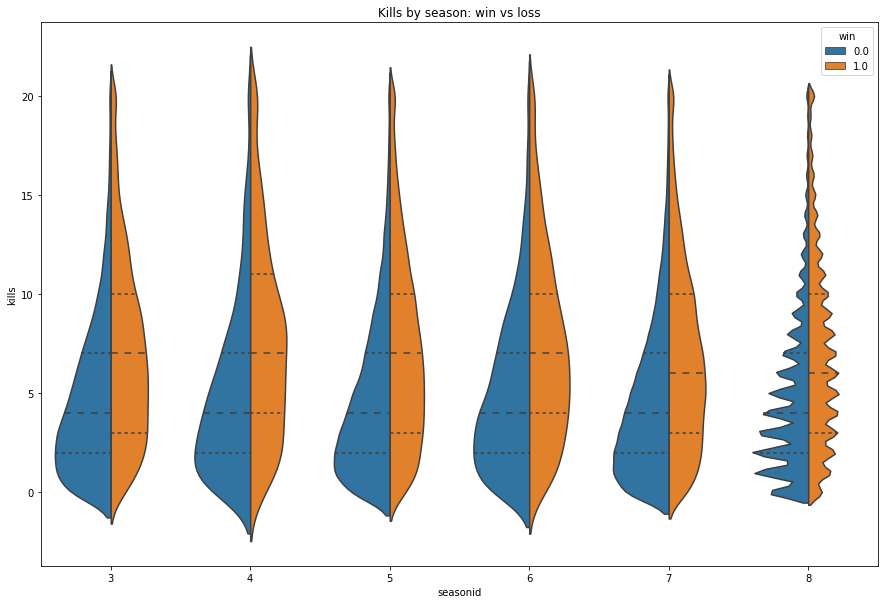

In [30]:
plt.figure(figsize = (15,10))

# put upper and lower limit from 0 to 20
df_v['kills'] = df_v['kills'].apply(lambda x: x if x<20 else 20)
df_v['kills'] = df_v['kills'].apply(lambda x: x if x>0 else 0)

sns.violinplot(x="seasonid", y="kills", hue="win", data=df_v, split=True, inner = 'quartile')
plt.title('Kills by season: win vs loss')
plt.savefig('Kills.png')

In [31]:
len(df_v[df_v['seasonid'] == 8])

1404012

In [32]:
len(df_v[df_v['seasonid'] == 7])

34270

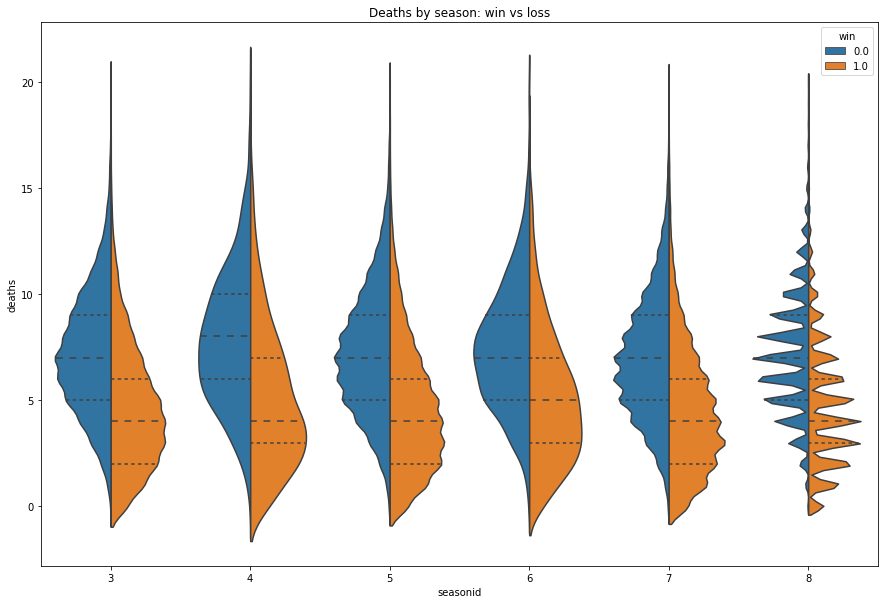

In [33]:
plt.figure(figsize = (15,10))

# put upper and lower limit from 0 to 20
df_v['deaths'] = df_v['deaths'].apply(lambda x: x if x<20 else 20)
df_v['deaths'] = df_v['deaths'].apply(lambda x: x if x>0 else 0)

sns.violinplot(x="seasonid", y="deaths", hue="win", data=df_v, split=True, inner = 'quartile')
plt.title('Deaths by season: win vs loss')
plt.savefig('Deaths.png')

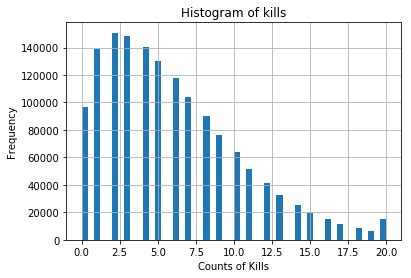

In [34]:
df_v['kills'].hist(bins = 50)
plt.title('Histogram of kills')
plt.xlabel('Counts of Kills')
plt.ylabel('Frequency')
plt.savefig('kills_freq.png')

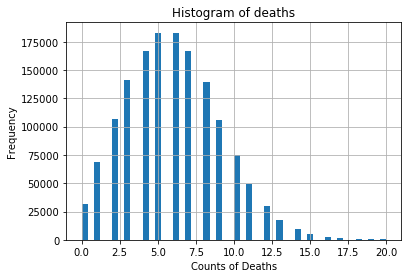

In [35]:
df_v['deaths'].hist(bins = 50)
plt.title('Histogram of deaths')
plt.xlabel('Counts of Deaths')
plt.ylabel('Frequency')
plt.savefig('deaths_freq.png')

## Correlation matrix -- Feature selections

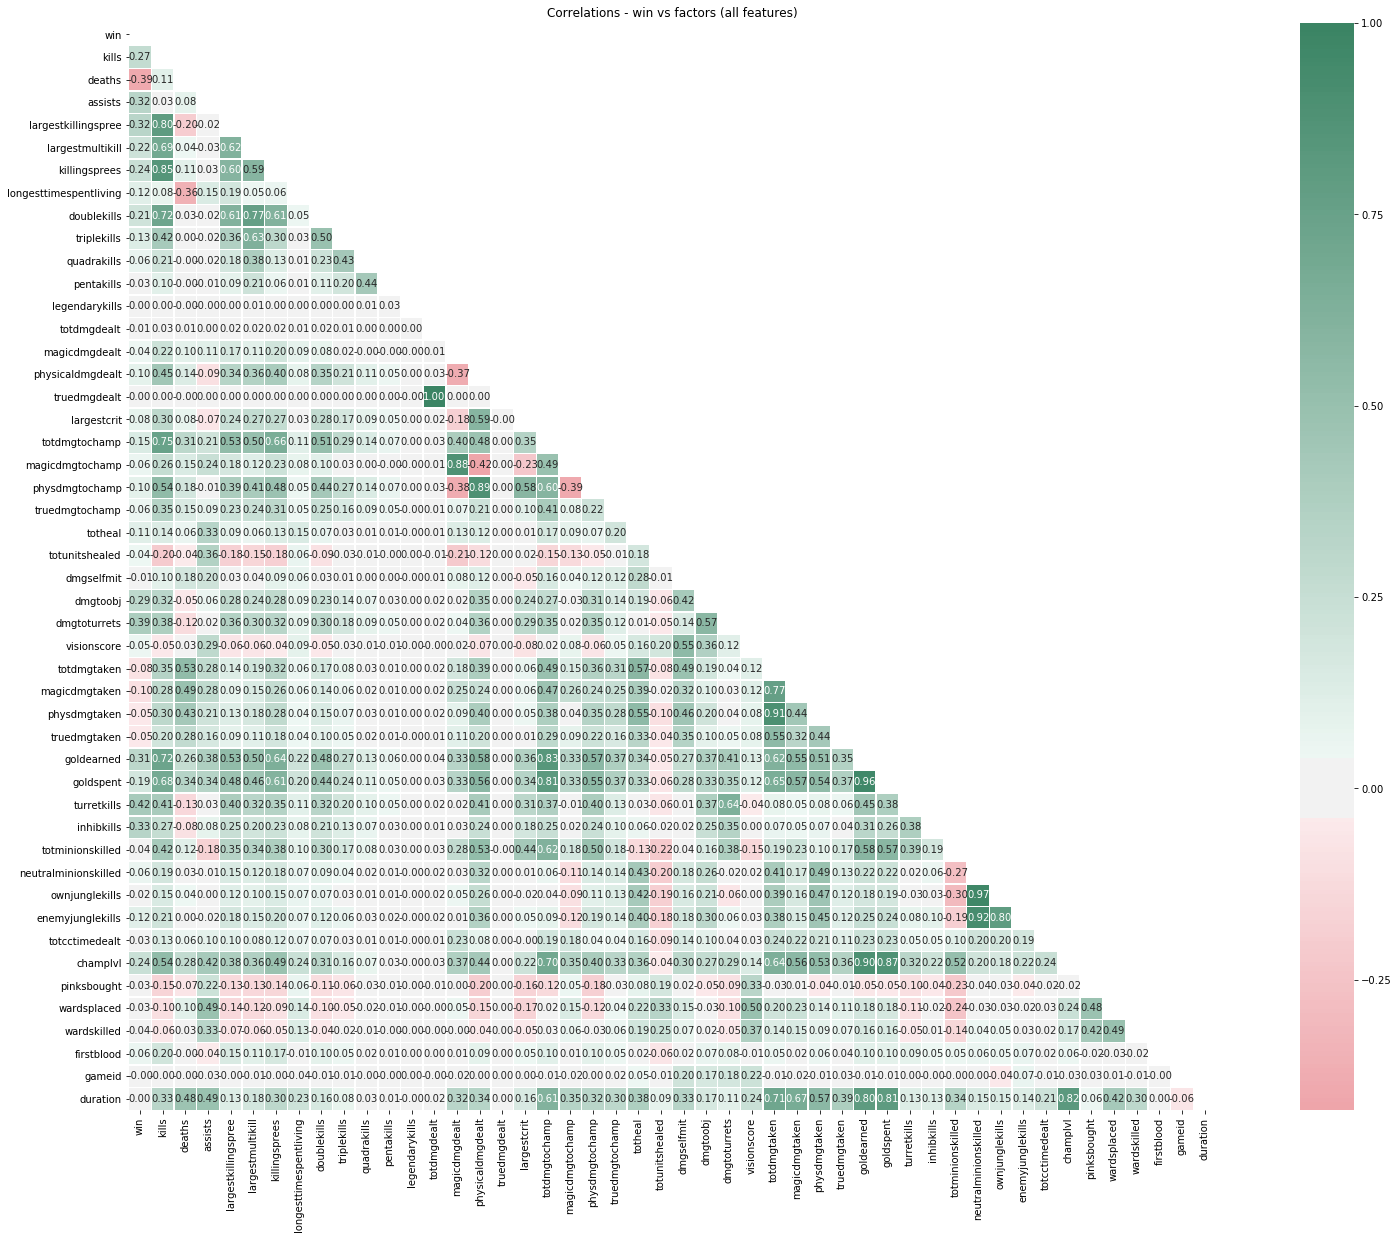

In [36]:
df_corr = df._get_numeric_data()
df_corr = df_corr.drop(['id', 'matchid', 'player', 'seasonid',
                       'item1','championid','item3','item5',
                       'id_y','timecc','queueid','creation','ss2','ss1',
                       'item2','item4','item6','trinket'], axis = 1)

mask = np.zeros_like(df_corr.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(10, 150, as_cmap=True)

plt.figure(figsize = (30,20))
sns.heatmap(df_corr.corr(), cmap = cmap, annot = True, fmt = '.2f', mask = mask, square=True, linewidths=.5, center = 0)
plt.title('Correlations - win vs factors (all features)')
plt.savefig('Correlations_all.png')

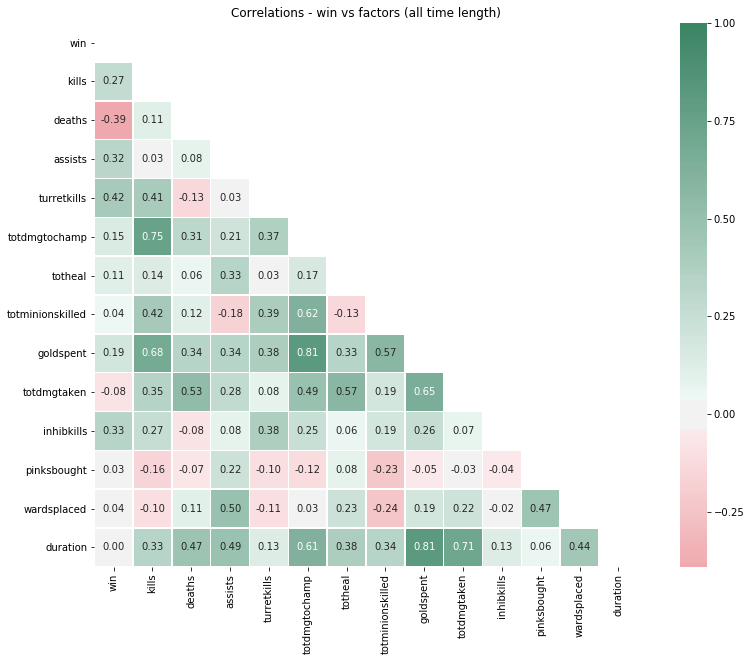

In [37]:
df_corr = df_v._get_numeric_data()
df_corr = df_corr.drop(['id', 'matchid', 'player', 'seasonid'], axis = 1)

mask = np.zeros_like(df_corr.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(10, 150, as_cmap=True)

plt.figure(figsize = (15,10))
sns.heatmap(df_corr.corr(), cmap = cmap, annot = True, fmt = '.2f', mask = mask, square=True, linewidths=.5, center = 0)
plt.title('Correlations - win vs factors (all time length)')
plt.savefig('Correlations_part_fulltime.png')

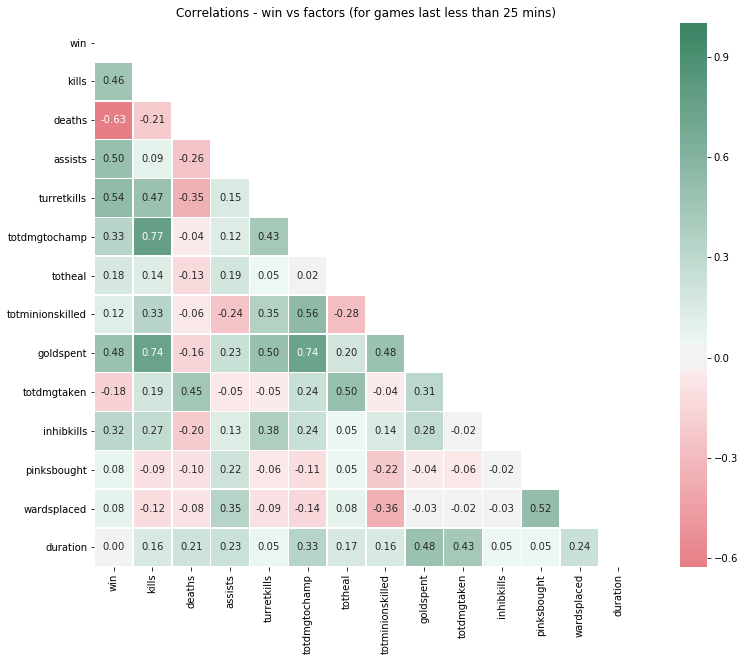

In [38]:
df_corr_2 = df_v._get_numeric_data()
# for games less than 25mins
df_corr_2 = df_corr_2[df_corr_2['duration'] <= 1500]
df_corr_2 = df_corr_2.drop(['id', 'matchid', 'player', 'seasonid'], axis = 1)

mask = np.zeros_like(df_corr_2.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(10, 150, as_cmap=True)

plt.figure(figsize = (15,10))
sns.heatmap(df_corr_2.corr(), cmap = cmap, annot = True, fmt = '.2f', mask = mask, square=True, linewidths=.5, center = 0)
plt.title('Correlations - win vs factors (for games last less than 25 mins)')
plt.savefig('Correlations_part_time25less.png')

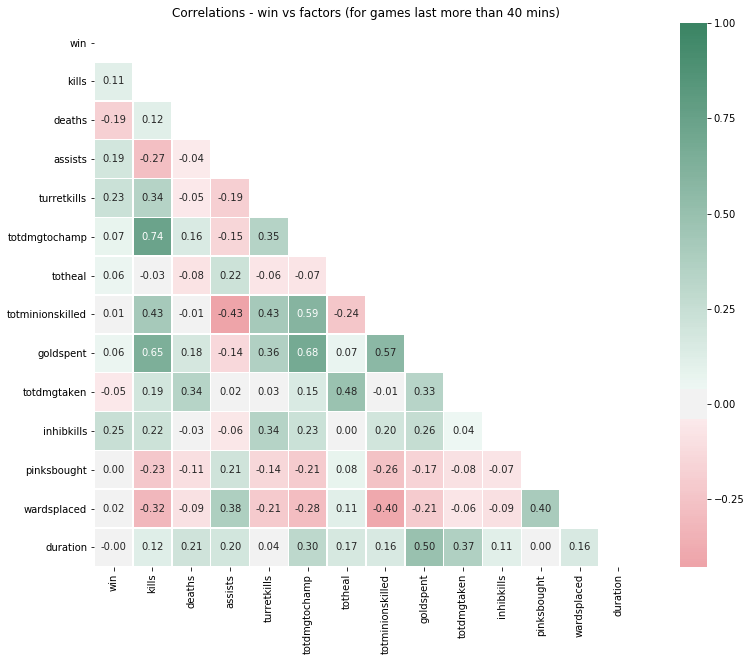

In [39]:
df_corr_3 = df_v._get_numeric_data()
# for games more than 40mins
df_corr_3 = df_corr_3[df_corr_3['duration'] > 2400]
df_corr_3 = df_corr_3.drop(['id', 'matchid', 'player', 'seasonid'], axis = 1)

mask = np.zeros_like(df_corr_3.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(10, 150, as_cmap=True)

plt.figure(figsize = (15,10))
sns.heatmap(df_corr_3.corr(), cmap = cmap, annot = True, fmt = '.2f', mask = mask, square=True, linewidths=.5, center = 0)
plt.title('Correlations - win vs factors (for games last more than 40 mins)')
plt.savefig('Correlations_part_time40more.png')

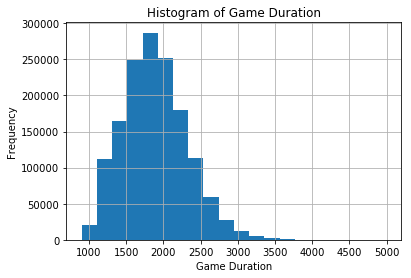

In [40]:
df_v['duration'].hist(bins = 20)
plt.title('Histogram of Game Duration')
plt.xlabel('Game Duration')
plt.ylabel('Frequency')
plt.savefig('duration.png')

## Champion win rate

In [41]:
pd.options.display.float_format = '{:,.1f}'.format

df_win_rate = df_se.groupby('name').agg({'win': 'sum', 'name': 'count', 'kills': 'mean', 'deaths': 'mean', 'assists': 'mean'})

df_win_rate.columns = ['win matches', 'total matches', 'K', 'D', 'A']
df_win_rate['win rate'] = (df_win_rate['win matches'] /  df_win_rate['total matches']) * 100
df_win_rate['KDA'] = (df_win_rate['K'] + df_win_rate['A']) / df_win_rate['D']
df_win_rate = df_win_rate.sort_values('win rate', ascending = False)
df_win_rate = df_win_rate[['total matches', 'win rate', 'K', 'D', 'A', 'KDA']]
print('Top 10 win rate')
print(df_win_rate.head(10))
print('Bottom 10 win rate')
print(df_win_rate.tail(10))

Top 10 win rate
         total matches  win rate   K        D    A  KDA
name                                                   
Lucian             5.6 838,952.0 7.3 23,508.0  7.1  0.0
Caitlyn            5.8 823,248.0 6.4 24,144.0  7.4  0.0
Lee Sin            6.2 786,179.0 6.7 23,434.0  8.5  0.0
Thresh             5.5 719,194.8 2.1 20,039.0 14.4  0.0
Ahri               5.6 555,531.4 7.3 16,514.0  7.7  0.0
Janna              4.0 527,129.9 0.9 11,166.0 14.5  0.0
Vayne              6.4 440,555.2 7.8 14,160.0  6.0  0.0
Ezreal             5.5 430,539.7 6.7 10,676.0  8.0  0.0
Orianna            5.6 420,579.9 6.3 11,788.0  8.7  0.0
Lulu               5.0 416,712.2 1.8 10,517.0 13.8  0.0
Bottom 10 win rate
              total matches  win rate   K       D   A  KDA
name                                                      
Azir                    6.6  39,150.2 5.9 1,144.0 6.6  0.0
Kindred                 6.9  38,178.0 6.6 1,343.0 7.6  0.0
Singed                  6.8  37,759.9 4.0 1,250.0 7.6  0.

## Preliminary models

In [42]:
df_se = df_se.drop(['version'],axis = 1)

In [43]:
df_se_2 = df_se.copy()

In [44]:
# remove missing data
print('Before drop missing data: {}'.format(len(df_se_2)))
df_se_2 = df_se_2.dropna()
print('After drop missing data: {}'.format(len(df_se_2)))

Before drop missing data: 1486362
After drop missing data: 1486359


In [46]:
import sklearn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

In [47]:
from sklearn.linear_model import LogisticRegression

In [209]:
y = df_se_2['win']
X = df_se_2[df_se.columns.difference(['win'])]

X_drop = X.drop(['id','matchid' ],axis = 1)
X_ohe = pd.get_dummies(X_drop)

X_train, X_test, y_train, y_test = train_test_split(X_ohe,y, test_size = 0.3, random_state = 101)

lr = LogisticRegression(penalty = 'l1', solver = 'liblinear')
lr.fit(X_train,y_train)
tra_acc = lr.score(X_train, y_train)
pre_acc = lr.score(X_test, y_test)

print("Training accuracy:", tra_acc)
print("Prediction accuracy:", pre_acc)

Training accuracy: 0.8548437168112675
Prediction accuracy: 0.8547906743094988


In [222]:
y = df_se_2['win']
X = df_se_2[df_se.columns.difference(['win'])]

X_drop = X.drop(['id','matchid' ],axis = 1)
X_ohe = pd.get_dummies(X_drop)

X_train, X_test, y_train, y_test = train_test_split(X_ohe,y, test_size = 0.3, random_state = 101)

rf_m = RandomForestClassifier(n_estimators=200, max_depth=30,n_jobs=4)
rf_m.fit(X_train,y_train)
tra_acc = rf_m.score(X_train, y_train)
pre_acc = rf_m.score(X_test, y_test)

print("Training accuracy:", tra_acc)
print("Prediction accuracy:", pre_acc)

Training accuracy: 0.9760113643025957
Prediction accuracy: 0.8556361401903532


In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [52]:
dt = DecisionTreeClassifier(criterion = "entropy", max_depth = 15)
#rf = BaggingClassifier(base_estimator = model_dt, n_estimators = 150)
#ad = AdaBoostClassifier(base_estimator = model_rf, n_estimators = 150)
model_dt = dt.fit(X_train, y_train)
tra_acc_dt = model_dt.score(X_train, y_train)
pre_acc_dt = model_dt.score(X_test, y_test)

print("Training accuracy:", tra_acc_dt)
print("Prediction accuracy:", pre_acc_dt)

Training accuracy: 0.8656794024898818
Prediction accuracy: 0.8341967401347363


In [53]:
dic = {}
for name, importance in zip(X_train.columns, model_dt.feature_importances_):
    dic[name] = importance
count = 0
print("Top 15 features important for win rate:")
for s in sorted(dic, key=dic.get, reverse=True):
    print(s, dic[s])
    count += 1
    if count == 15:
        break

Top 15 features important for win rate:
deaths 0.2426420851589342
turretkills 0.23671451181984451
assists 0.18749927287304535
inhibkills 0.09702086858636583
duration 0.06044903413185778
kills 0.04266164787732561
goldspent 0.036578639129284295
totdmgtaken 0.02158749076641693
totminionskilled 0.017828726067840625
totheal 0.01169712242889165
totdmgtochamp 0.010367327264401243
adjposition_DUO_CARRY 0.005772771084112773
wardsplaced 0.005220300001052176
player 0.0031317848944839807
pinksbought 0.0019008821594900377


## More features

In [136]:
df_corr_2_na = df_corr_2.dropna()

In [98]:
df_corr_2 = df._get_numeric_data()
df_corr_2 = df_corr_2.drop(['id', 'matchid', 'player', 'seasonid',
                       'item1','championid','item3','item5',
                       'id_y','timecc','queueid','creation','ss2','ss1',
                       'item2','item4','item6','trinket'], axis = 1)
df_corr_win = df_corr_2.corr()['win']
df_corr_win

win                       1.0
kills                     0.3
deaths                   -0.4
assists                   0.3
largestkillingspree       0.3
largestmultikill          0.2
killingsprees             0.2
longesttimespentliving    0.1
doublekills               0.2
triplekills               0.1
quadrakills               0.1
pentakills                0.0
legendarykills            0.0
totdmgdealt               0.0
magicdmgdealt             0.0
physicaldmgdealt          0.1
truedmgdealt              0.0
largestcrit               0.1
totdmgtochamp             0.1
magicdmgtochamp           0.1
physdmgtochamp            0.1
truedmgtochamp            0.1
totheal                   0.1
totunitshealed            0.0
dmgselfmit               -0.0
dmgtoobj                  0.3
dmgtoturrets              0.4
visionscore               0.1
totdmgtaken              -0.1
magicdmgtaken            -0.1
physdmgtaken             -0.1
truedmgtaken             -0.0
goldearned                0.3
goldspent 

In [127]:
df_corr_win = df_corr_win.apply(abs)
df_corr_win = df_corr_win.sort_values(ascending=False)
corr_fea = df_corr_win[df_corr_win>0.03].index.difference(['win'])

In [122]:
corr_fea

array(['assists', 'champlvl', 'deaths', 'dmgtoobj', 'dmgtoturrets',
       'doublekills', 'enemyjunglekills', 'firstblood', 'goldearned',
       'goldspent', 'inhibkills', 'killingsprees', 'kills', 'largestcrit',
       'largestkillingspree', 'largestmultikill',
       'longesttimespentliving', 'magicdmgdealt', 'magicdmgtaken',
       'magicdmgtochamp', 'neutralminionskilled', 'pentakills',
       'physdmgtaken', 'physdmgtochamp', 'physicaldmgdealt',
       'pinksbought', 'quadrakills', 'totcctimedealt', 'totdmgtaken',
       'totdmgtochamp', 'totheal', 'totminionskilled', 'totunitshealed',
       'triplekills', 'truedmgtaken', 'truedmgtochamp', 'turretkills',
       'visionscore', 'wardskilled', 'wardsplaced'], dtype=object)

In [138]:
y = df_corr_2_na['win']
X_new = df_corr_2_na[corr_fea]

In [139]:
X_train_fea, X_test_fea, y_train_fea, y_test_fea = train_test_split(X_new,y, test_size = 0.3, random_state = 101)
lr = LogisticRegression(penalty = 'l1', solver = 'liblinear')
lr.fit(X_train_fea,y_train_fea)
tra_acc_fea = lr.score(X_train_fea, y_train_fea)
pre_acc_fea = lr.score(X_test_fea, y_test_fea)

print("Training accuracy:", tra_acc_fea)
print("Prediction accuracy:", pre_acc_fea)

Training accuracy: 0.8864300192897119
Prediction accuracy: 0.8859473254572692


In [159]:
dic_fea = {}
for name, importance in zip(X_train_fea.columns, abs(lr.coef_[0])):
    dic_fea[name] = importance
count = 0
print("Top 20 features coefficients for win rate:")
for s in sorted(dic_fea, key=dic_fea.get, reverse=True):
    print(s, dic_fea[s])
    count += 1
    if count == 20:
        break

Top 20 features coefficients for win rate:
inhibkills 1.2804761799741664
deaths 0.551870635590486
turretkills 0.46397916188617055
pentakills 0.31605201696429763
largestmultikill 0.24632407385005575
quadrakills 0.17645197892504894
triplekills 0.1402736509400443
totunitshealed 0.13897004127924611
doublekills 0.1267960848975129
assists 0.10607295171394392
pinksbought 0.09221321837212162
firstblood 0.08142114089431657
wardskilled 0.07738310137939179
wardsplaced 0.05752053307680139
enemyjunglekills 0.05368439275258534
champlvl 0.04823272837062819
kills 0.044623445179196836
neutralminionskilled 0.02462099002957761
visionscore 0.016047323004913537
killingsprees 0.014156585303196847


In [168]:
top_20_fea = list(dic_fea.keys())

## Try new featrues

In [202]:
top_20_fea += ['team_role','name']

In [192]:
X_new.columns

Index(['totdmgtochamp', 'totunitshealed', 'neutralminionskilled', 'goldspent',
       'turretkills', 'visionscore', 'deaths', 'pinksbought', 'magicdmgdealt',
       'enemyjunglekills', 'wardskilled', 'goldearned', 'totminionskilled',
       'totcctimedealt', 'firstblood', 'truedmgtaken', 'pentakills',
       'inhibkills', 'assists', 'magicdmgtochamp', 'truedmgtochamp',
       'triplekills', 'magicdmgtaken', 'dmgtoturrets', 'quadrakills',
       'doublekills', 'largestcrit', 'dmgtoobj', 'totheal',
       'longesttimespentliving', 'physicaldmgdealt', 'killingsprees',
       'largestmultikill', 'totdmgtaken', 'wardsplaced', 'physdmgtochamp',
       'kills', 'largestkillingspree', 'champlvl', 'physdmgtaken'],
      dtype='object')

In [205]:
df_na = df.dropna()
y = df_na['win']
X_new = pd.get_dummies(df_na[top_20_fea])

X_train_fea, X_test_fea, y_train_fea, y_test_fea = train_test_split(X_new,y, test_size = 0.3, random_state = 101)
lr = LogisticRegression(penalty = 'l1', solver = 'liblinear')
lr.fit(X_train_fea,y_train_fea)
tra_acc_fea = lr.score(X_train_fea, y_train_fea)
pre_acc_fea = lr.score(X_test_fea, y_test_fea)

print("Training accuracy:", tra_acc_fea)
print("Prediction accuracy:", pre_acc_fea)

Training accuracy: 0.8993907449750156
Prediction accuracy: 0.8988199359509137


## Random Forest

In [208]:
y = df_se_2['win']
X = df_se_2[df_se.columns.difference(['win'])]

X_drop = X.drop(['id','matchid' ],axis = 1)
X_ohe = pd.get_dummies(X_drop)

X_train, X_test, y_train, y_test = train_test_split(X_ohe,y, test_size = 0.3, random_state = 101)

rf_model = RandomForestClassifier(n_estimators=100,max_depth=50)
rf_model.fit(X_train,y_train)
tra_acc = rf_model.score(X_train, y_train)
pre_acc = rf_model.score(X_test, y_test)

print("Training accuracy:", tra_acc)
print("Prediction accuracy:", pre_acc)

Training accuracy: 0.9999971166349977
Prediction accuracy: 0.8552190137875975


# Prediction with champions with 2017 world championship example

In [54]:
# pivot data to what we want in format

df_champ = df_se[['matchid', 'player', 'name', 'team_role', 'win']]

df_champ = df_champ.pivot(index = 'matchid', columns = 'team_role', values = 'name')
df_champ = df_champ.reset_index()
df_champ = df_champ.merge(df_se[df_se['player'] == 1][['matchid', 'win', 'platformid', 'seasonid']], left_on = 'matchid', right_on = 'matchid', how = 'left')
df_champ = df_champ[df_champ.columns.difference(['matchid'])]
df_champ = df_champ.rename(columns = {'win': 'Team 1 win'})

df_champ.head(5)

,1 - DUO_CARRY,1 - DUO_SUPPORT,1 - JUNGLE,1 - MID,1 - TOP,2 - DUO_CARRY,2 - DUO_SUPPORT,2 - JUNGLE,2 - MID,2 - TOP,platformid,seasonid,Team 1 win
0,Draven,Nami,Warwick,Viktor,Fiora,Jinx,VelKoz,Skarner,Ahri,Galio,EUW1,8,0.0
1,Cassiopeia,Ziggs,Evelynn,Yasuo,Twisted Fate,Caitlyn,Karma,Warwick,Syndra,Wukong,EUW1,8,0.0
2,Draven,Janna,Amumu,Lux,Vayne,Twitch,Nami,Vi,Ahri,Caitlyn,EUW1,8,0.0
3,Caitlyn,Zac,Wukong,Orianna,Urgot,Lucian,Karma,Warwick,Morgana,Darius,EUW1,8,0.0
4,Miss Fortune,Thresh,Warwick,Ahri,Garen,Ziggs,Nami,Lee Sin,Yasuo,Tryndamere,EUW1,8,1.0


In [55]:
# remove missing data
print('Before drop missing data: {}'.format(len(df_champ)))
df_champ = df_champ.dropna()
print('After drop missing data: {}'.format(len(df_champ)))

Before drop missing data: 148638
After drop missing data: 148635


In [56]:
y_champ = df_champ['Team 1 win']
X_champ = df_champ[df_champ.columns.difference(['Team 1 win'])]

In [57]:
# prepare for SKT vs SSG
s_g1 = pd.Series(['Varus', 'Lulu', 'Gragas', 'Cassiopeia', 'Gnar', 'Xayah', 'Janna', 'Zac', 'Malzahar', 'Kennen', 'NA1', 8], index = df_champ[df_champ.columns.difference(['Team 1 win'])].columns)
s_g2 = pd.Series(['Varus', 'Lulu', 'Gragas', 'Ryze', 'Yasuo', 'Xayah', 'Janna', 'Jarvan IV', 'Malzahar', 'Gnar', 'NA1', 8], index = df_champ[df_champ.columns.difference(['Team 1 win'])].columns)
s_g3 = pd.Series(['Tristana', 'Leona', 'Gragas', 'Karma', 'Trundle', 'Varus', 'Lulu', 'Sejuani', 'Malzahar', 'ChoGath', 'NA1', 8], index = df_champ[df_champ.columns.difference(['Team 1 win'])].columns)

# add for transformation
X_champ = X_champ.append(s_g1, ignore_index=True)
X_champ = X_champ.append(s_g2, ignore_index=True)
X_champ = X_champ.append(s_g3, ignore_index=True)

In [58]:
#le = LabelEncoder()
#X_t_1 = X.apply(le.fit_transform)
ohe = OneHotEncoder()
ohe_t = ohe.fit(X_champ)
X_t = ohe_t.transform(X_champ)

In [59]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_t[:-3], y_champ, test_size = 0.3, random_state = 101)

## Logistic regression

In [63]:
lr_c = LogisticRegression(penalty = 'l2', solver = 'liblinear')
lr_c.fit(X_train_c,y_train_c)
tra_acc_c = lr_c.score(X_train_c, y_train_c)
pre_acc_c = lr_c.score(X_test_c, y_test_c)

print("Training accuracy:", tra_acc_c)
print("Prediction accuracy:", pre_acc_c)

Training accuracy: 0.5658951981853831
Prediction accuracy: 0.5450651476755399


In [61]:
print('Team 1 = SKT  vs. Team 2 = SSG')
print('Game 1 SKT win rate: {} \n{}\n'.format(lr_c.predict_proba(X_t[-3])[0][1], pd.DataFrame(s_g1, columns = ['Champ'])))
print('Game 2 SKT win rate: {} \n{}\n'.format(lr_c.predict_proba(X_t[-2])[0][1], pd.DataFrame(s_g2, columns = ['Champ'])))
print('Game 3 SKT win rate: {} \n{}\n'.format(lr_c.predict_proba(X_t[-1])[0][1], pd.DataFrame(s_g3, columns = ['Champ'])))

Team 1 = SKT  vs. Team 2 = SSG
Game 1 SKT win rate: 0.45234412013485226 
                      Champ
1 - DUO_CARRY         Varus
1 - DUO_SUPPORT        Lulu
1 - JUNGLE           Gragas
1 - MID          Cassiopeia
1 - TOP                Gnar
2 - DUO_CARRY         Xayah
2 - DUO_SUPPORT       Janna
2 - JUNGLE              Zac
2 - MID            Malzahar
2 - TOP              Kennen
platformid              NA1
seasonid                  8

Game 2 SKT win rate: 0.37559875300532575 
                     Champ
1 - DUO_CARRY        Varus
1 - DUO_SUPPORT       Lulu
1 - JUNGLE          Gragas
1 - MID               Ryze
1 - TOP              Yasuo
2 - DUO_CARRY        Xayah
2 - DUO_SUPPORT      Janna
2 - JUNGLE       Jarvan IV
2 - MID           Malzahar
2 - TOP               Gnar
platformid             NA1
seasonid                 8

Game 3 SKT win rate: 0.4796998416697271 
                    Champ
1 - DUO_CARRY    Tristana
1 - DUO_SUPPORT     Leona
1 - JUNGLE         Gragas
1 - MID             Kar

## Random forest

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
rf = RandomForestClassifier(n_estimators=200,max_depth=50)
rf.fit(X_train_c,y_train_c)
tra_rf = rf.score(X_train_c, y_train_c)
pre_rf = rf.score(X_test_c, y_test_c)

print("Training accuracy:", tra_rf)
print("Prediction accuracy:", pre_rf)

Training accuracy: 0.9865825996693707
Prediction accuracy: 0.5360050234352224


In [ ]:
y = df_se_2['win']
X = df_se_2[df_se.columns.difference(['win'])]

X_drop = X.drop(['id','matchid' ],axis = 1)
X_ohe = pd.get_dummies(X_drop)

X_train, X_test, y_train, y_test = train_test_split(X_ohe,y, test_size = 0.3, random_state = 101)

lr = LogisticRegression(penalty = 'l1', solver = 'liblinear')
lr.fit(X_train,y_train)
tra_acc = lr.score(X_train, y_train)
pre_acc = lr.score(X_test, y_test)

print("Training accuracy:", tra_acc)
print("Prediction accuracy:", pre_acc)

# What may cause player a higher KDA

In [278]:
# handle na value
df_na_c = df_na.copy()

df_na_c = df_na.reset_index(drop = True)

df_na_c['KDA'] = (df_na_c['kills'] + df_na_c['assists'])/(df_na_c['deaths'] + 1)

df_na_c.dropna(inplace=True)

df_na_c.reset_index(drop=True, inplace=True)

df_na_c.isna().sum()

id                        0
matchid                   0
player                    0
championid                0
ss1                       0
ss2                       0
role                      0
position                  0
win                       0
item1                     0
item2                     0
item3                     0
item4                     0
item5                     0
item6                     0
trinket                   0
kills                     0
deaths                    0
assists                   0
largestkillingspree       0
largestmultikill          0
killingsprees             0
longesttimespentliving    0
doublekills               0
triplekills               0
quadrakills               0
pentakills                0
legendarykills            0
totdmgdealt               0
magicdmgdealt             0
                         ..
truedmgtaken              0
goldearned                0
goldspent                 0
turretkills               0
inhibkills          

In [279]:
from sklearn.linear_model import LinearRegression

In [310]:
linear_model = LinearRegression()
fea_KDA = list(top_20_fea)
X_KDA = pd.get_dummies(df_na_c[fea_KDA])
y_KDA = df_na_c['KDA']
X_train, X_test, y_train, y_test = train_test_split(X_KDA,y_KDA, test_size = 0.3, random_state = 101)
linear_model.fit(X_train,y_train)
tra_acc = linear_model.score(X_train, y_train)
pre_acc = linear_model.score(X_test, y_test)

print("Training accuracy:", tra_acc)
print("Prediction accuracy:", pre_acc)

Training accuracy: 0.6673321757595942
Prediction accuracy: 0.670877863783192


In [307]:
dict_KDA = {}
for fea, coef in zip(fea_KDA, linear_model.coef_):
    dict_KDA[fea] = coef

for fea in sorted(dict_KDA.items(), key = lambda kv: abs(kv[1]),reverse=True):
    print(fea[0] + ' : ' + str(fea[1]))

deaths : -0.4838411537316905
largestkillingspree : 0.3476923257370135
killingsprees : -0.2695422840449046
assists : 0.18439476513948228
quadrakills : -0.15919354246529657
triplekills : -0.14173025271927028
pentakills : -0.1174416392412957
firstblood : 0.0983985435369646
kills : 0.08872714288165955
doublekills : -0.04673632437460112
totunitshealed : 0.021105309920749972
turretkills : 0.013142294545507114
magicdmgtaken : 0.012448613684243928
totdmgtaken : -0.012447304049102492
physdmgtaken : 0.012447045854310005
truedmgtaken : 0.012429274157584038
champlvl : 0.010472567779811282
pinksbought : 0.00952904046403141
largestmultikill : 0.009161406619000046
inhibkills : -0.008631387111907448
wardsplaced : -0.005886422117715589
wardskilled : -0.004043750707792647
neutralminionskilled : -0.0030911369117932273
enemyjunglekills : 0.0021925999049256985
totminionskilled : -0.0021377453020364145
longesttimespentliving : -0.0014664937616747826
visionscore : -7.596086019440258e-05
goldearned : 6.771911

## What may cause a player longer living time

In [309]:
df_na.columns longesttimespentliving

Index(['id', 'matchid', 'player', 'championid', 'ss1', 'ss2', 'role',
       'position', 'win', 'item1', 'item2', 'item3', 'item4', 'item5', 'item6',
       'trinket', 'kills', 'deaths', 'assists', 'largestkillingspree',
       'largestmultikill', 'killingsprees', 'longesttimespentliving',
       'doublekills', 'triplekills', 'quadrakills', 'pentakills',
       'legendarykills', 'totdmgdealt', 'magicdmgdealt', 'physicaldmgdealt',
       'truedmgdealt', 'largestcrit', 'totdmgtochamp', 'magicdmgtochamp',
       'physdmgtochamp', 'truedmgtochamp', 'totheal', 'totunitshealed',
       'dmgselfmit', 'dmgtoobj', 'dmgtoturrets', 'visionscore', 'timecc',
       'totdmgtaken', 'magicdmgtaken', 'physdmgtaken', 'truedmgtaken',
       'goldearned', 'goldspent', 'turretkills', 'inhibkills',
       'totminionskilled', 'neutralminionskilled', 'ownjunglekills',
       'enemyjunglekills', 'totcctimedealt', 'champlvl', 'pinksbought',
       'wardsbought', 'wardsplaced', 'wardskilled', 'firstblood', 'name

In [311]:
df_na_time = df_na.copy()

In [313]:
linear_time = LinearRegression()
fea_time = list(top_20_fea)
X_time = pd.get_dummies(df_na_time[fea_time])
y_time = df_na_time['longesttimespentliving']
X_train, X_test, y_train, y_test = train_test_split(X_time,y_time, test_size = 0.3, random_state = 101)
linear_time.fit(X_train,y_train)
tra_acc = linear_time.score(X_train, y_train)
pre_acc = linear_time.score(X_test, y_test)

print("Training accuracy:", tra_acc)
print("Prediction accuracy:", pre_acc)

Training accuracy: 1.0
Prediction accuracy: 1.0


In [326]:
dict_time = {}
for fea, coef in zip(fea_KDA, linear_time.coef_):
    dict_time[fea] = coef

for fea in sorted(dict_time.items(), key = lambda kv: abs(kv[1]),reverse=True):
    print(fea[0] + ' : ' + str(fea[1]))

longesttimespentliving : 1.0000000000000024
team_role : -4.951376059762106e-05
name : -4.951376058957244e-05
firstblood : -9.401368572525826e-13
quadrakills : 5.996789436552019e-13
pentakills : -5.240252676230739e-13
turretkills : -1.7358049676438614e-13
pinksbought : 1.5438865463845985e-13
inhibkills : 6.2304328363183e-14
doublekills : -5.892920700023563e-14
totunitshealed : -5.785172688121953e-14
assists : -4.313444133124955e-14
wardskilled : -3.418446081759896e-14
enemyjunglekills : -3.241417551036463e-14
triplekills : 3.207655495385264e-14
largestmultikill : -3.013951596435825e-14
deaths : 2.996908277097532e-14
killingsprees : 2.7371984887003542e-14
visionscore : 2.5851282919875374e-14
champlvl : -2.5129895451884987e-14
kills : 8.469760266402449e-15
largestkillingspree : -1.3605415893295364e-15
neutralminionskilled : -1.3305871161828353e-15
totminionskilled : -1.186550857568136e-15
totcctimedealt : -7.494005416219807e-16
physdmgtochamp : 7.351026254723281e-16
totdmgtochamp : -6.901